# Lifestyle-Based Blood Pressure Prediction

**Prepared for**: UMBC Data Science Master’s Degree Capstone – Dr. Chaojie (Jay) Wang  

**Author**: Mera Mathew 

- **GitHub Repository**: *[https://github.com/MeraMathew/UMBC-DATA606-Capstone]*  
- **LinkedIn Profile**: *[https://www.linkedin.com/in/mera-mathew-026771170/]*  
- **YouTube Video Presentation**: *[https://youtu.be/iThk3fUDH90]* 

## 2. Background

Hypertension (high blood pressure) is a leading risk factor for cardiovascular disease and stroke.  
This project develops a machine-learning regression model to **predict systolic and diastolic blood pressure** using demographic, dietary, physical activity, smoking, and alcohol indicators derived from the U.S. **National Health and Nutrition Examination Survey (NHANES)**.

**Why it matters**  
- Enables early detection of elevated blood pressure risk.  
- Highlights modifiable lifestyle factors—such as sodium intake, exercise, smoking, and drinking—that can guide personal and public-health interventions.  
- Demonstrates an end-to-end data science workflow with real public health data.

**Research Questions**  
1. To what extent can demographic, diet, physical activity, smoking, and alcohol variables predict blood pressure?  
2. Which factors contribute most to systolic and diastolic blood pressure?


## 3. Data

#### Data Sources
NHANES survey cycles covering **August 2021 – August 2023**  
(publicly available at [https://www.cdc.gov/nchs/nhanes/](https://www.cdc.gov/nchs/nhanes/)):

To build a single machine-learning-ready table, **combined several NHANES component datasets** by joining on the unique participant ID `SEQN`:

- **Examination**: BPX (Blood Pressure), BMX (Body Measures)
- **Demographics**: DEMO
- **Dietary**: DR1TOT (Day-1 nutrient intake)
- **Physical Activity**: PAQ
- **Smoking**: SMQ
- **Alcohol**: ALQ

This integration step ensured that each participant’s demographics, body measures, diet, activity level, smoking history, and alcohol consumption are available in **one dataset**.

#### Data Details

- **Time period covered**  
  August 2021 – August 2023 (NHANES survey cycles for those two years)

- **Observation unit**  
  Each row represents **one individual NHANES participant**, with all lifestyle, demographic, and health measurements merged into a single record.

- **Data dictionary (key columns)**  

| Column | Type | Definition / Units | Categories / Encoded Labels |
|--------|------|--------------------|------------------------------|
| `Participant_ID` | int | Unique NHANES participant ID | e.g., 130378 |
| `Systolic_BP` | float | Mean systolic blood pressure (mmHg) | – |
| `Diastolic_BP` | float | Mean diastolic blood pressure (mmHg) | – |
| `Age_Years` | int | Age of participant | e.g., 43 |
| `Gender` | category | Biological sex | 0 = Male, 1 = Female |
| `Race_Ethnicity` | category | Race/ethnicity group | 0 = Non-Hispanic White, 1 = Non-Hispanic Black, 2 = Mexican American, 3 = Other (Other Hispanic, Non-Hispanic Asian, Multiracial) |
| `BMI` | float | Body Mass Index (kg/m²) | e.g., 27.5 |
| `Weight_kg` | float | Body weight | e.g., 74.0 |
| `Height_cm` | float | Body height | e.g., 172.0 |
| `Sodium_mg` | float | Daily sodium intake | e.g., 3200 |
| `Potassium_mg` | float | Daily potassium intake | e.g., 2900 |
| `Calories_kcal` | float | Total daily calorie intake | e.g., 2100 |
| `Vigorous_Activity_Days` | int | Days/week of vigorous activity | 0–7 |
| `Moderate_Activity_Days` | int | Days/week of moderate activity | 0–7 |
| `Ever_Smoked_100_Cigs` | category | Ever smoked ≥100 cigarettes | 0 = No, 1 = Yes |
| `Current_Smoking_Status` | category | Current smoking frequency | 0 = Not at all, 1 = Some days, 2 = Every day |
| `Drinks_per_Week` | float | Estimated alcoholic drinks per week | e.g., 2.5 |
| `Had_12_Drinks_Lifetime` | category | Ever consumed ≥12 drinks in lifetime | 0 = No, 1 = Yes |

- **Target / Label variables for ML model**  
  - `Systolic_BP`  
  - `Diastolic_BP`

- **Feature / Predictor candidates**  
  - Demographics: `Age_Years`, `Gender`, `Race_Ethnicity`
  - Body measures: `BMI`, `Weight_kg`, `Height_cm`
  - Diet: `Sodium_mg`, `Potassium_mg`, `Calories_kcal`
  - Physical activity: `Vigorous_Activity_Days`, `Moderate_Activity_Days`
  - Lifestyle habits: `Ever_Smoked_100_Cigs`, `Current_Smoking_Status`, `Drinks_per_Week`

In [3]:
import pandas as pd

# Loading the combined dataset
df = pd.read_csv("nhanes_bp_lifestyle_clean.csv")

# Overview
print(df.shape)
df.head()
df.info()
df.describe()

(7518, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7518 entries, 0 to 7517
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Participant_ID          7518 non-null   float64
 1   Systolic_BP             7518 non-null   float64
 2   Diastolic_BP            7518 non-null   float64
 3   Pulse_Rate              7518 non-null   float64
 4   Age_Years               7518 non-null   float64
 5   Gender                  7518 non-null   object 
 6   Race_Ethnicity          7518 non-null   object 
 7   BMI                     7453 non-null   float64
 8   Weight_kg               7467 non-null   float64
 9   Height_cm               7475 non-null   float64
 10  Sodium_mg               5820 non-null   float64
 11  Potassium_mg            5820 non-null   float64
 12  Calories_kcal           5820 non-null   float64
 13  Ever_Smoked_100_Cigs    6114 non-null   object 
 14  Current_Smoking_Status  2436 

,Participant_ID,Systolic_BP,Diastolic_BP,Pulse_Rate,Age_Years,BMI,Weight_kg,Height_cm,Sodium_mg,Potassium_mg,Calories_kcal,Cigarettes_Per_Day,Drinks_Per_Day
count,7518.000000,7518.000000,7518.000000,7518.000000,7518.000000,7453.000000,7467.000000,7475.000000,5.820000e+03,5.820000e+03,5.820000e+03,2.040000e+02,4015.000000
mean,136338.014099,119.094418,72.210894,73.041789,44.993748,28.261425,77.661614,164.754395,3.050609e+03,2.405703e+03,1.976426e+03,1.265196e+01,5.891905
std,3453.214803,18.151729,11.463845,12.564442,22.657383,7.564814,24.382140,12.098596,1.605981e+03,1.260558e+03,9.036276e+02,1.386179e+01,55.363277
min,130378.000000,70.000000,34.000000,34.000000,8.000000,11.100000,20.000000,118.100000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000
25%,133316.250000,106.333333,64.000000,64.333333,23.000000,23.100000,61.400000,157.500000,1.992000e+03,1.574000e+03,1.385000e+03,3.000000e+00,1.000000
50%,136362.500000,116.333333,71.666667,72.166667,47.000000,27.200000,75.500000,165.100000,2.752500e+03,2.214500e+03,1.846000e+03,1.000000e+01,2.000000
75%,139316.500000,129.000000,79.333333,81.000000,65.000000,32.300000,91.600000,173.100000,3.751500e+03,2.991250e+03,2.428000e+03,2.000000e+01,3.000000
max,142310.000000,232.333333,139.000000,151.000000,80.000000,68.900000,248.200000,200.700000,2.000600e+04,1.429600e+04,1.044600e+04,9.900000e+01,999.000000


## Data Preprocessing

#### Data Preprocessing Overview

Before modeling, the dataset is cleaned to handle missing values and reduce redundancy. Columns with excessive missing data are removed, while numeric and categorical features are imputed using statistically appropriate strategies. This step ensures a consistent, reliable dataset and minimizes issues such as noise and multicollinearity during model training.


In [2]:
# Percentage of missing values per column
df.isnull().mean().sort_values(ascending=False)

Cigarettes_Per_Day        0.972865
Current_Smoking_Status    0.675978
Drinks_Per_Day            0.465948
Sodium_mg                 0.225858
Calories_kcal             0.225858
Potassium_mg              0.225858
Ever_Smoked_100_Cigs      0.186752
BMI                       0.008646
Weight_kg                 0.006784
Height_cm                 0.005720
Systolic_BP               0.000000
Race_Ethnicity            0.000000
Gender                    0.000000
Age_Years                 0.000000
Pulse_Rate                0.000000
Diastolic_BP              0.000000
Participant_ID            0.000000
dtype: float64

In [3]:
import pandas as pd

def preprocess(df):
    # Drop column with too many missing values
    if 'Cigarettes_Per_Day' in df:
        df = df.drop(columns=['Cigarettes_Per_Day'])

    # median
    for col in ['Sodium_mg', 'Potassium_mg', 'Calories_kcal']:
        if col in df:
            df[col] = df[col].fillna(df[col].median())

    # mode
    if 'Ever_Smoked_100_Cigs' in df:
        df['Ever_Smoked_100_Cigs'] = df['Ever_Smoked_100_Cigs'].fillna(df['Ever_Smoked_100_Cigs'].mode()[0])

    if 'Current_Smoking_Status' in df:
        df['Current_Smoking_Status'] = df['Current_Smoking_Status'].fillna('Unknown')

    # Fill drinks info
    if 'Drinks_Per_Day' in df:
        df['Drinks_Per_Day'] = df['Drinks_Per_Day'].fillna(0)  

    # Return cleaned df
    df2 = preprocess(df)
    return df

In [7]:
import pandas as pd

def preprocess(df):
    # Make a copy to preserve original data
    df2 = df.copy()

    # Drop column with too many missing values
    if 'Cigarettes_Per_Day' in df2:
        df2 = df2.drop(columns=['Cigarettes_Per_Day'])

    # Fill numeric columns with median
    for col in ['Sodium_mg', 'Potassium_mg', 'Calories_kcal']:
        if col in df2:
            df2[col] = df2[col].fillna(df2[col].median())

    # Fill categorical columns
    if 'Ever_Smoked_100_Cigs' in df2:
        df2['Ever_Smoked_100_Cigs'] = df2['Ever_Smoked_100_Cigs'].fillna(df2['Ever_Smoked_100_Cigs'].mode()[0])

    if 'Current_Smoking_Status' in df2:
        df2['Current_Smoking_Status'] = df2['Current_Smoking_Status'].fillna('Unknown')

    # Fill drinks info
    if 'Drinks_Per_Day' in df2:
        df2['Drinks_Per_Day'] = df2['Drinks_Per_Day'].fillna(0)

    # Remove BMI to avoid multicollinearity
    if 'BMI' in df2:
        df2 = df2.drop(columns=['BMI'])
        print("Removed BMI column to avoid multicollinearity.")

    # Fill height and weight with median
    for col in ['Height_cm', 'Weight_kg']:
        if col in df2:
            df2[col] = df2[col].fillna(df2[col].median())
    print("Filled missing height and weight with median values.")

    # Return cleaned dataframe
    return df2

df2 = preprocess(df)

# Check missing values
df2.isnull().mean().sort_values(ascending=False)

Removed BMI column to avoid multicollinearity.
Filled missing height and weight with median values.


Participant_ID            0.0
Systolic_BP               0.0
Diastolic_BP              0.0
Pulse_Rate                0.0
Age_Years                 0.0
Gender                    0.0
Race_Ethnicity            0.0
Weight_kg                 0.0
Height_cm                 0.0
Sodium_mg                 0.0
Potassium_mg              0.0
Calories_kcal             0.0
Ever_Smoked_100_Cigs      0.0
Current_Smoking_Status    0.0
Drinks_Per_Day            0.0
dtype: float64

#### Preprocessing Conclusion

Through this preprocessing step, missing values were systematically addressed using median, mode, or logical defaults, ensuring minimal information loss. Highly sparse and redundant features, such as cigarette count and BMI, were removed to improve data quality and reduce multicollinearity. As a result, the final dataset is cleaner, more stable, and better suited for accurate and interpretable blood pressure prediction modeling.


## 4. Exploratory Data Analysis

In [1]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#### Plot 1: Distribution of Systolic and Diastolic BP

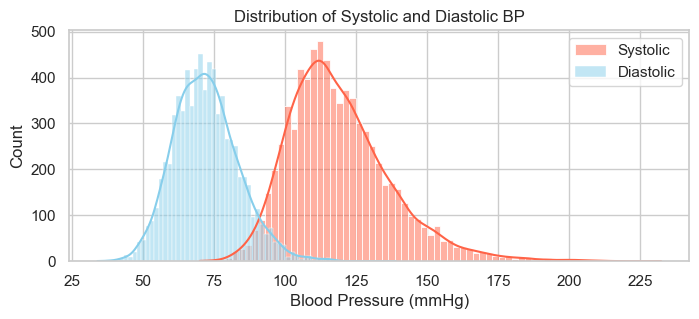

In [9]:
plt.figure(figsize=(8,3))
sns.histplot(df2['Systolic_BP'], kde=True, color='tomato', label='Systolic')
sns.histplot(df2['Diastolic_BP'], kde=True, color='skyblue', label='Diastolic')
plt.title("Distribution of Systolic and Diastolic BP")
plt.xlabel("Blood Pressure (mmHg)")
plt.legend()
plt.show()

##### Distribution of Systolic and Diastolic Blood Pressure
This plot shows the distribution of systolic and diastolic blood pressure across all participants. Systolic BP has a wider spread and slightly higher skewness compared to diastolic BP, which is more tightly clustered.


#### Plot 2: Systolic BP vs Age

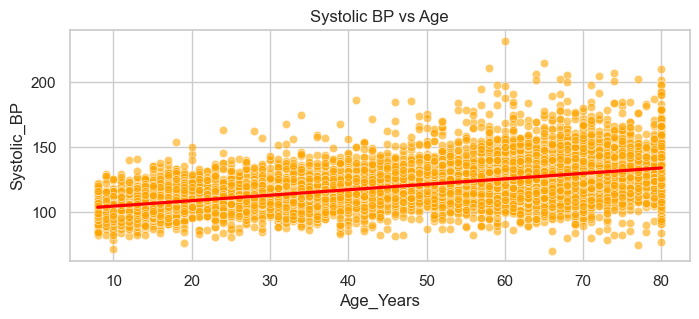

In [19]:
plt.figure(figsize=(8,3))
sns.scatterplot(x='Age_Years', y='Systolic_BP', data=df2, alpha=0.6, color='orange')
sns.regplot(x='Age_Years', y='Systolic_BP', data=df2, scatter=False, color='red')
plt.title("Systolic BP vs Age")
plt.show()

##### Relationship Between Age and Systolic Blood Pressure
This scatter plot with a regression trendline illustrates how systolic BP increases with age. The upward trend indicates a positive correlation, consistent with clinical evidence that age is one of the strongest predictors of elevated blood pressure.

#### Plot 3: Systolic BP by Gender

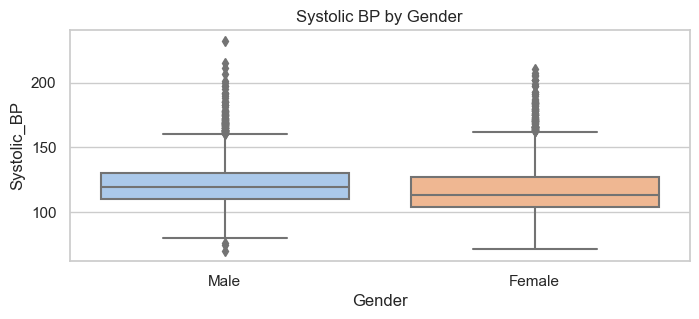

In [16]:
plt.figure(figsize=(8,3))
sns.boxplot(x='Gender', y='Systolic_BP', data=df2, palette='pastel')
plt.title("Systolic BP by Gender")
plt.show()

##### Comparison of Systolic Blood Pressure Between Male and Female Participants
This boxplot compares systolic BP across gender groups. Males show slightly higher median systolic BP and a wider spread, suggesting gender differences in blood pressure distribution.

#### Plot 4: Systolic BP by Race/Ethnicity

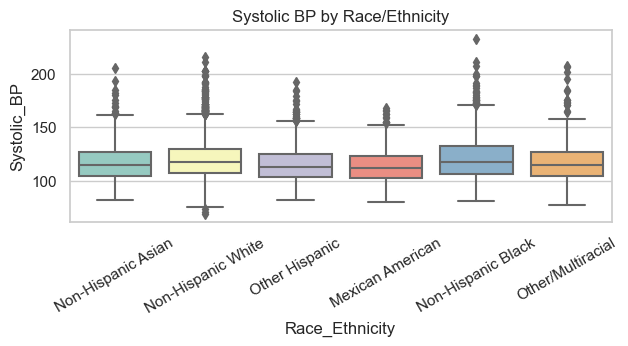

In [24]:
plt.figure(figsize=(7,2.5))
sns.boxplot(x='Race_Ethnicity', y='Systolic_BP', data=df2, palette='Set3')
plt.title("Systolic BP by Race/Ethnicity")
plt.xticks(rotation=30)
plt.show()

##### Variation in Systolic Blood Pressure Across Race/Ethnic Groups
This boxplot shows that systolic BP varies across demographic groups. Some ethnic groups exhibit higher median BP and wider dispersion, indicating potential disparities related to genetic, socioeconomic, or lifestyle factors.

#### Plot 5: Systolic BP by Smoking Status

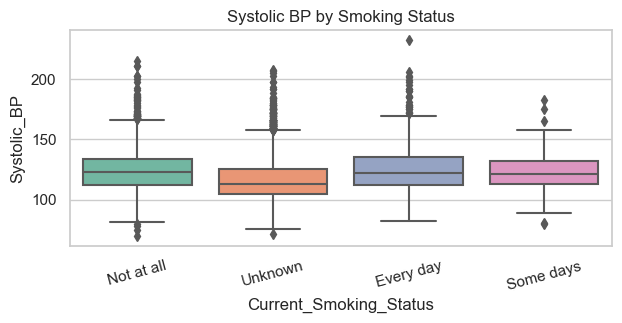

In [22]:
#Systolic BP by Smoking Status
plt.figure(figsize=(7,2.8))
sns.boxplot(x='Current_Smoking_Status', y='Systolic_BP', data=df2, palette='Set2')
plt.title("Systolic BP by Smoking Status")
plt.xticks(rotation=15)
plt.show()

##### Impact of Smoking Frequency on Systolic Blood Pressure
This visualization compares systolic BP among non-smokers, occasional smokers, and daily smokers. Daily smokers show a slightly elevated BP distribution.

#### Plot 6: Systolic BP vs Alcohol Intake

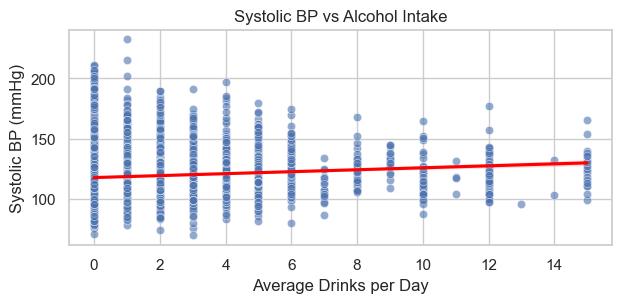

In [25]:
plt.figure(figsize=(7,2.8))
sns.scatterplot(x='Drinks_Per_Day', y='Systolic_BP', data=df2[df2['Drinks_Per_Day'] <= 600], alpha=0.6)
sns.regplot(x='Drinks_Per_Day', y='Systolic_BP', data=df2[df2['Drinks_Per_Day'] <= 600],
            scatter=False, color='red')
plt.title("Systolic BP vs Alcohol Intake")
plt.xlabel("Average Drinks per Day")
plt.ylabel("Systolic BP (mmHg)")
plt.show()

##### Relationship Between Alcohol Consumption and Systolic Blood Pressure
This scatter plot examines whether systolic BP increases with alcohol intake. The trendline indicates a mild positive relationship, suggesting heavier alcohol consumption may be associated with higher BP.

#### Plot 7: Systolic BP vs Weight (Colored by Height)

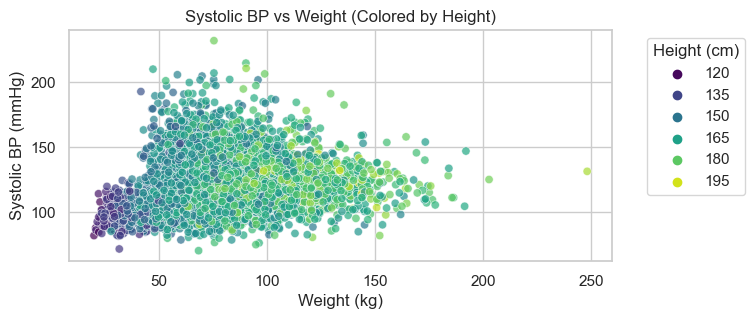

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,3))
sns.scatterplot(
    x='Weight_kg',
    y='Systolic_BP',
    hue='Height_cm',
    data=df2,
    palette='viridis',
    alpha=0.7
)
plt.title("Systolic BP vs Weight (Colored by Height)")
plt.xlabel("Weight (kg)")
plt.ylabel("Systolic BP (mmHg)")
plt.legend(title="Height (cm)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Relationship Between Weight and Systolic Blood Pressure, Colored by Height
This scatter plot shows how systolic BP varies with body weight, while height is encoded using a color gradient.
Heavier individuals tend to show slightly higher BP, although with broad variability.

## 5. Model Training and Evaluation

In this section, multiple regression models are trained to predict **systolic** and **diastolic blood pressure** using demographic, lifestyle, and dietary features. A unified preprocessing pipeline is applied to handle missing values, scale numerical variables, and encode categorical features. The dataset is split into training and testing subsets, and model performance is evaluated using cross-validation to ensure robustness and prevent overfitting.

Three regression models are considered:
- **ElasticNet Regression** as a regularized linear baseline
- **Random Forest Regressor** to capture nonlinear relationships and feature interactions
- **Gradient Boosting Regressor** for sequential error minimization

Hyperparameter tuning is performed using GridSearchCV with 5-fold cross-validation, and model performance is compared using MAE, RMSE, and R² metrics.

In [35]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Use df2
df2.head()

,Participant_ID,Systolic_BP,Diastolic_BP,Pulse_Rate,Age_Years,Gender,Race_Ethnicity,Weight_kg,Height_cm,Sodium_mg,Potassium_mg,Calories_kcal,Ever_Smoked_100_Cigs,Current_Smoking_Status,Drinks_Per_Day
0,130378.0,132.666667,96.000000,81.000000,43.0,Male,Non-Hispanic Asian,86.9,179.5,2628.0,1917.0,1740.0,Yes,Not at all,0.0
1,130379.0,117.000000,78.666667,72.000000,66.0,Male,Non-Hispanic White,101.8,174.2,5635.0,5470.0,2741.0,Yes,Not at all,3.0
2,130380.0,109.000000,78.333333,81.333333,44.0,Female,Other Hispanic,69.4,152.9,2890.0,2116.0,1995.0,No,Unknown,1.0
3,130386.0,115.000000,73.666667,62.333333,34.0,Male,Mexican American,90.6,173.3,4136.0,2680.0,2422.0,Yes,Not at all,2.0
4,130387.0,141.333333,76.000000,79.000000,68.0,Female,Non-Hispanic White,103.5,155.9,6294.0,3800.0,3849.0,No,Unknown,0.0


In [30]:
# Define targets
targets = ["Systolic_BP", "Diastolic_BP"]
y = df2[targets].copy()

# Drop only the target columns + ID
drop_cols = set(targets) | {"Participant_ID"}
X = df2.drop(columns=[c for c in drop_cols if c in df2.columns])

X.shape, y.shape


((7518, 12), (7518, 2))

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Identify categorical and numeric columns
cat_cols = [c for c in X.columns if X[c].dtype == "object"]
num_cols = [c for c in X.columns if c not in cat_cols]
#numerical pipeline
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
#categorical pipeline
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])
#ColumnTransformer:Combining Both Pipelines
preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

In [32]:
#Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape)


(6014, 12) (1504, 12)


In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#Dictionary of model candidates and their hyperparameter grids.
candidates = {
    "ElasticNet": (ElasticNet(max_iter=5000, random_state=42), {
        "model__alpha": [0.01, 0.1, 1.0],
        "model__l1_ratio": [0.1, 0.5, 0.9],
    }),
    "RandomForest": (RandomForestRegressor(n_estimators=300, random_state=42), {
        "model__max_depth": [None, 10, 20],
        "model__min_samples_leaf": [1, 3, 5],
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), {
        "model__n_estimators": [150, 300],
        "model__learning_rate": [0.05, 0.1],
    }),
}

In [36]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),
        "R2": r2_score(y_true, y_pred),
    }

cv_results = []
best_models = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for tgt in targets:
    best_r2 = -np.inf
    for name, (model, grid) in candidates.items():
        pipe = Pipeline([("pre", preprocess), ("model", model)])
        gs = GridSearchCV(pipe, grid, scoring="r2", cv=kfold, n_jobs=-1, refit=True, verbose=0)
        gs.fit(X_train, y_train[tgt])

        y_pred_train = gs.predict(X_train)
        metrics = evaluate(y_train[tgt], y_pred_train)
        cv_results.append({"Target": tgt, "Model": name, **metrics})
        
        if metrics["R2"] > best_r2:
            best_r2 = metrics["R2"]
            best_models[tgt] = gs.best_estimator_

cv_df = pd.DataFrame(cv_results)
cv_df


C:\Users\meera\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,Target,Model,MAE,RMSE,R2
0,Systolic_BP,ElasticNet,11.208415,15.122757,0.304854
1,Systolic_BP,RandomForest,8.836498,12.164143,0.550244
2,Systolic_BP,GradientBoosting,10.393761,14.109385,0.394896
3,Diastolic_BP,ElasticNet,7.650082,10.015676,0.239249
4,Diastolic_BP,RandomForest,5.691472,7.528378,0.570182
5,Diastolic_BP,GradientBoosting,6.889629,9.039315,0.380340


### Model Performance Summary and Conclusion

The results indicate clear performance differences among the evaluated models. For both systolic and diastolic blood pressure prediction, the **Random Forest Regressor** consistently achieved the lowest error values and the highest R² scores.

Key observations:
- Random Forest explained approximately **55% of the variance** in systolic BP and **57% in diastolic BP**, outperforming both ElasticNet and Gradient Boosting.
- ElasticNet showed limited predictive power, suggesting that linear relationships alone are insufficient for this problem.
- Gradient Boosting performed moderately well but did not surpass Random Forest in accuracy or stability.

Based on these results, **Random Forest was selected as the final model** for deployment in the Streamlit application. Its ability to model nonlinear relationships and handle complex feature interactions makes it well suited for predicting blood pressure from heterogeneous health and lifestyle data.


## Streamlit

After identifying the Random Forest models as the best-performing predictors for systolic and diastolic blood pressure, the trained models are serialized for reuse in the web application. The `joblib` library is used to persist the models efficiently, allowing them to be loaded later without retraining.

These saved models will be integrated into the Streamlit application to generate real-time blood pressure predictions based on user input.

In [1]:
import sys
!{sys.executable} -m pip install streamlit

In [ ]:
import joblib

# Extract saved models
best_rf_sys = best_models["Systolic_BP"]
best_rf_dia = best_models["Diastolic_BP"]

# Save as pkl files
joblib.dump(best_rf_sys, "rf_systolic.pkl")
joblib.dump(best_rf_dia, "rf_diastolic.pkl")


In [ ]:
!streamlit run simple_bp_app.py